# Obtain detuning from FID

In [2]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit

#absolute path of repo root
rel_path = Path("/home/ben/Documents/Repos/382L_NMRLab/data/ben_ruobin_nmr_feb02/T1_CuSO4")

In [3]:
def smooth(y, pts): #Rolling avg smoothing
    box = np.ones(pts)/pts
    yfilt=np.convolve(y,box,mode='same')
    return yfilt

In [4]:
FIDData = pd.read_csv(rel_path / "1200.csv", header = None)
chan1 = FIDData[1].values
chan2 = FIDData[2].values
tlist = FIDData[0].values

chan1 = np.subtract(chan1, np.mean(chan1[2000:]))
chan2 = np.subtract(chan2, np.mean(chan2[2000:]))

chan1_smooth = smooth(chan1, 35)
chan2_smooth = smooth(chan2, 35)

trans_mag = np.sqrt(np.square(chan1_smooth) + np.square(chan2_smooth))

In [5]:
peaks, _ = sc.signal.find_peaks(
    np.square(trans_mag),
   # height = .2,
    distance = 250,
    #prominence = .5,
    width = 400
)

In [6]:
cut_times = {100:1250, 200:1000, 500:1200, 800:1150, 1000:1000, 1200:700, 1400:1200, 1600:1000, 1800:1000}

In [7]:
trans_mag = trans_mag[1000:]

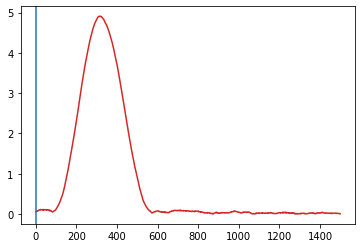

In [8]:
#plt.plot(tlist, chan1_smooth, color = "tab:red")
plt.plot(trans_mag, color = "tab:red")
plt.axvline(tlist[np.argmax(trans_mag)])
#plt.plot(tlist, chan2_smooth, color = "tab:blue")

In [12]:
def get_max(time):
    FIDData = pd.read_csv(rel_path / f"{time}.csv", header = None)
    chan1 = FIDData[1].values[cut_times[time]:]
    chan2 = FIDData[2].values[cut_times[time]:]
    tlist = FIDData[0].values[cut_times[time]:]

    print(chan1)

    chan1 = np.subtract(chan1, np.mean(chan1[1000:]))
    chan2 = np.subtract(chan2, np.mean(chan2[1000:]))
    
    chan1_smooth = smooth(chan1, 35)
    chan2_smooth = smooth(chan2, 35)
    
    trans_mag = np.sqrt(np.square(chan1_smooth) + np.square(chan2_smooth))

    return np.max(trans_mag)

In [69]:
data = [(time*10e-4, get_max(time)) for time in [100,200,500,1000,1200,1400,1600,1800]]

[-2.32 -2.24 -2.24 ... -2.04 -2.   -2.08]
[-2.4  -2.24 -2.4  ... -2.16 -2.32 -2.24]
[-2.88 -2.8  -2.8  ... -2.24 -2.24 -2.16]
[-2.32 -2.24 -2.32 ... -2.08 -2.32 -2.16]
[-2.4  -2.56 -2.48 ... -2.4  -2.56 -2.32]
[-2.4  -2.32 -2.32 ... -2.16 -2.24 -2.24]
[-2.4  -2.24 -2.48 ... -2.32 -2.4  -2.24]
[-2.4  -2.32 -2.48 ... -2.4  -2.48 -2.48]


In [70]:

times, heights = zip(*sorted(data))

In [71]:
def exp(t, M, b):
    return M*(1-2*np.exp(-t/b))

In [95]:
popt, pcov = curve_fit(exp, times, heights, p0=[5, .1])

Text(0, 0.5, 'echo amplitdue (V)')

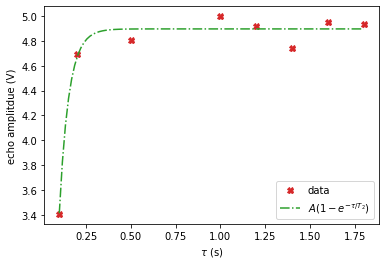

In [96]:
plt.plot(times, heights, marker = "X", linestyle = "None", color = "tab:red", label = "data")
xlist = np.linspace(min(times), max(times), 100)
plt.plot(xlist, [exp(x, *popt) for x in xlist], color = "tab:green", linestyle = "-.", label = r"$A(1-e^{-\tau/T_2})$")
plt.legend()
plt.xlabel(r"$\tau$ (s)")
plt.ylabel("echo amplitdue (V)")

In [91]:
popt[1]

0.05298456649368894